# Task 1 --- Oasis Infobyte

# Car Price Prediction using Python

# By -- Rahul Sharma

# About The Dataset

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower 
and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv('Car.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#Checking the shape of dataset
df.shape

(301, 9)

In [5]:
#Checking more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking for datatypes
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
#Checking for column names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#Checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
#Checking distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding Categorical Data

In [11]:
#Encoding Fuel_Type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [12]:
#Encoding Selling_type column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [15]:
#Encoding Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
#Checking that categorical columns are converted to numericals
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the training and testing data

In [19]:
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1)

In [20]:
y=df['Selling_Price']

In [21]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [22]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Split Training and Test Data

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [26]:
x_train.shape

(240, 7)

In [27]:
x_test.shape

(61, 7)

In [25]:
y_train.shape

(240,)

In [28]:
y_test.shape

(61,)

# Model Training

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [33]:
#Prediction on training data
predlr=lr.predict(x_train)

In [34]:
print(predlr)

[-6.94719614e-01  9.47148109e+00  7.52557310e+00  4.98808945e+00
  1.26543495e+00  4.52128070e+00  7.57218297e+00  8.64236777e+00
  3.59231970e+00  4.06328003e+00  2.18553792e-01  1.46481609e+00
  5.85144400e+00  1.94138197e+00  1.63802403e+00  6.21716149e+00
  3.88020017e+00  6.10692827e+00  5.20276040e+00  3.26276389e-01
  5.31121684e+00  7.37369852e-01  4.39563951e+00  5.27060449e+00
  2.80647929e+00  4.46294204e+00  3.08700817e+00  2.88580616e+00
  5.53824802e+00  1.36532136e+00  1.79376789e+00 -3.78208974e+00
  5.64664652e+00  1.61199989e+00  1.93072720e+01  1.01286454e+00
  1.23889908e+00  6.95214264e+00  3.63218486e+00  1.14577284e+00
  5.39053586e+00  4.38698395e+00  4.70383182e+00  7.21977371e-01
  1.59198136e+00  7.24243748e+00  1.55404555e+01  1.99986505e+00
  1.71581933e+00  9.39603825e+00  1.85219852e+00  2.15868290e+00
  1.67558495e+00  8.07970405e-01  4.78178375e+00  2.84878222e+00
  2.18520424e+00  4.75024286e+00  1.27529642e+00  2.72885614e+00
  2.88772445e+00  6.78343

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(predlr,y_train))

0.8853210659839411


# Visualize the actual prices and predicted prices 

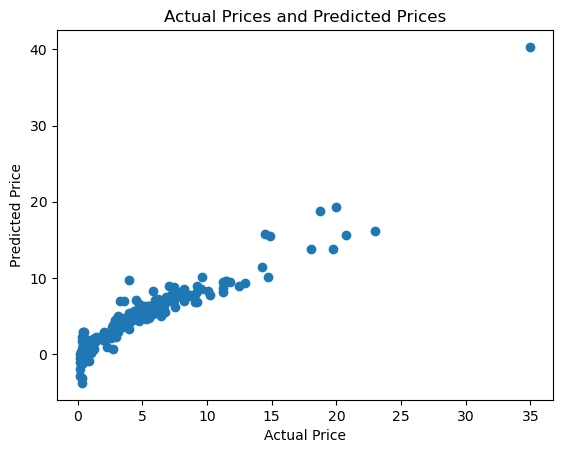

In [36]:
plt.scatter(y_train,predlr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices')
plt.show()

In [37]:
#Prediction on testing data
pred_lr=lr.predict(x_test)

In [38]:
print(r2_score(pred_lr,y_test))

0.7248516091465372


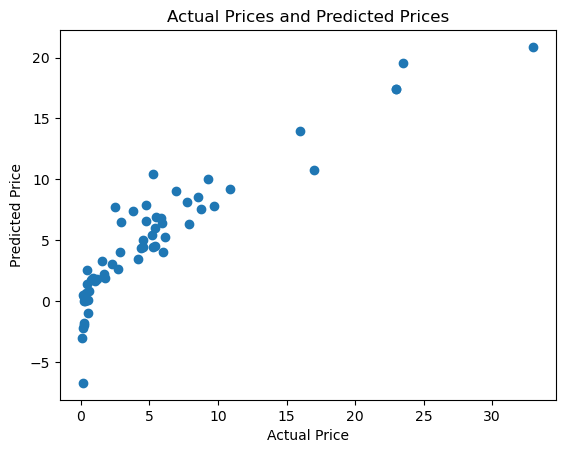

In [39]:
plt.scatter(y_test,pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices')
plt.show()

# Lasso Regression

In [40]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [41]:
ls.fit(x_train,y_train)

Lasso()

In [42]:
#Prediction on training data
predls=ls.predict(x_train)

In [43]:
print(r2_score(predls,y_train))

0.8099394938266313


# Visualize the actual and predicted prices

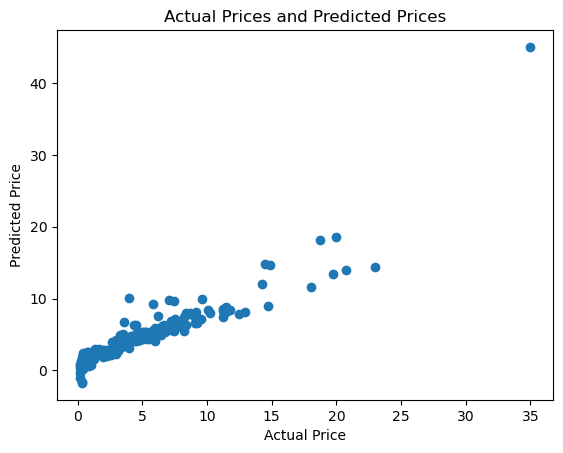

In [45]:
plt.scatter(y_train,predls)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices')
plt.show()

In [46]:
#Prediction on testing data
pred_ls=ls.predict(x_test)

In [47]:
print(r2_score(pred_ls,y_test))

0.6028198784283958


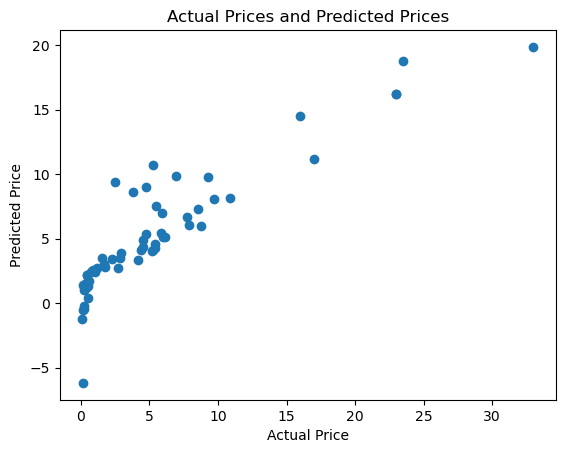

In [48]:
plt.scatter(y_test,pred_ls)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices and Predicted Prices')
plt.show()